## Problem 1: Geocode shopping centers (5 points)

The overall aim of problems 1-3 is to find out **how many people live within a walking distance (1.5 km) from certain shopping centers in Helsinki**.

In problem 1 aim is to find out the addresses of shopping centers and to retreive numercal coordinates for these addresses. As an output, we will have a Shapefile called `shopping_centers.shp` which contains the geocoded result.

**Preparation:** Find out the addresses for following shopping centers from the internet, and write the addresses into a text file called `shopping_centers.txt`:

 - Itis
 - Forum
 - Iso-omena
 - Sello
 - Jumbo
 - REDI
 - Tripla 
 
 *Hint for "Tripla": This shopping center opened in October 10 2019, and if you are doing this exercise soon after that, the official address might not yet be in online databases. 
 Check for an address nearby the Pasila railway station on OpenStreetMap.org and use that as input.*

`shopping_centers.txt` should have semicolon (`;`) as a separator, and the file should include the following columns:

- ``id`` (integer) containing an unique identifier for each shopping center
- ``name`` (string) of each shopping center
- ``addr`` (string) the address 


See and example of how to format the text file [in the lesson 3 materials](https://automating-gis-processes.github.io/site/master/notebooks/L3/geocoding_in_geopandas.html). Save (and upload) the text file into your exercise repository.

- Read `shopping_centers.txt` that you just created into a pandas DataFrame called ``data``:

In [1]:
# Import modules
import os
import pandas as pd
from shapely.geometry import LineString, Point, Polygon
import geopandas as gpd
from geopandas.tools import geocode
from pyproj import CRS
import requests
import geojson

# Read the data (replace "None" with your own code)
data = pd.read_csv("shopping_centers.txt", sep= ";")

data.head()



,id,name,addr
0,0,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland"
1,1,Forum,"Mannerheimintie 14-20, 00100 Helsinki, Finland"
2,2,Iso-Omena,"Piispansilta 11, 02230 Espoo, Finland"
3,3,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland"
4,4,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa"


In [2]:
#NON-EDITABLE TEST CELL
# Check your input data
print(data)

   id       name                                            addr
0   0       Itis            Itäkatu 1-7, 00930 Helsinki, Finland
1   1      Forum  Mannerheimintie 14-20, 00100 Helsinki, Finland
2   2  Iso-Omena           Piispansilta 11, 02230 Espoo, Finland
3   3      Sello       Leppävaarankatu 3-9, 02600 Espoo, Finland
4   4      Jumbo               Vantaanportinkatu 3, 01510 Vantaa
5   5       REDI            Hermannin rantatie 5, 00580 Helsinki
6   6     Tripla                 Pasilansilta 11, 00520 Helsinki


- Geocode the addresses using the Nominatim geocoding service. Store the output in a variable called `geo`:

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

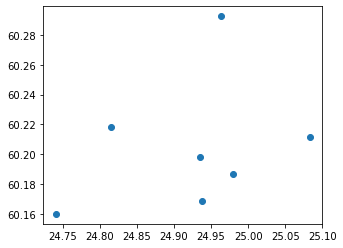

In [3]:
# Geocode addresses using Nominatim. Remember to provide a custom "application name" in the user_agent parameter!

geo = geocode(data['addr'], provider='nominatim', user_agent='autogis_jg', timeout=4)

geo.plot()
geo.crs

In [4]:
#NON-EDITABLE TEST CELL
# Check the geocoded output
print(geo)

                    geometry  \
0  POINT (25.08294 60.21170)   
1  POINT (24.93828 60.16878)   
2  POINT (24.74043 60.16013)   
3  POINT (24.81436 60.21856)   
4  POINT (24.96282 60.29245)   
5  POINT (24.97904 60.18702)   
6  POINT (24.93433 60.19821)   

                                             address  
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...  
1  Salaattiasema, 14-20, Mannerheimintie, Keskust...  
2  UpHouse LKV, 11, Piispansilta, Matinkylä, Suur...  
3  Aktia, 3-9, Leppävaarankatu, Säteri, Etelä-Lep...  
4  Stockmann, 3, Vantaanportinkatu, Vantaanportti...  
5  Silta, 5, Hermannin rantatie, Verkkosaari, Kal...  
6  Pasilansilta, Keski-Pasila, Pasila, Keskinen s...  


In [5]:
#NON-EDITABLE TEST CELL
# Check the data type (should be a GeoDataFrame!)
print(type(geo))

<class 'geopandas.geodataframe.GeoDataFrame'>


Check that the coordinate reference system of the geocoded result is correctly defined, and **reproject the layer into ETRS GK-25** (EPSG:3879):

In [6]:
geo = geo.set_crs(epsg=3879, allow_override=True)

In [7]:
#NON-EDITABLE TEST CELL
# Check layer crs
print(geo.crs)

epsg:3879


- Make a table join between the geocoded addresses (``geo``) and the original addresses (``data``) in order to link the numerical coordinates and  the `id` and `name` of each shopping center. 
- Store the output in a variable called ``geodata`` 


<AxesSubplot:>

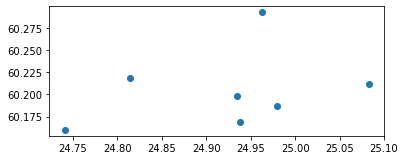

In [8]:
# Join the tables
geodata = geo.join(data)
geodata.plot()

In [9]:
#NON-EDITABLE TEST CELL
# Check the join output
print(geodata.head())

                geometry                                            address  \
0  POINT (25.083 60.212)  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...   
1  POINT (24.938 60.169)  Salaattiasema, 14-20, Mannerheimintie, Keskust...   
2  POINT (24.740 60.160)  UpHouse LKV, 11, Piispansilta, Matinkylä, Suur...   
3  POINT (24.814 60.219)  Aktia, 3-9, Leppävaarankatu, Säteri, Etelä-Lep...   
4  POINT (24.963 60.292)  Stockmann, 3, Vantaanportinkatu, Vantaanportti...   

   id       name                                            addr  
0   0       Itis            Itäkatu 1-7, 00930 Helsinki, Finland  
1   1      Forum  Mannerheimintie 14-20, 00100 Helsinki, Finland  
2   2  Iso-Omena           Piispansilta 11, 02230 Espoo, Finland  
3   3      Sello       Leppävaarankatu 3-9, 02600 Espoo, Finland  
4   4      Jumbo               Vantaanportinkatu 3, 01510 Vantaa  


- Save the output as a Shapefile called `shopping_centers.shp` 

In [10]:
# Define output filepath
out_fp = r"shopping_centers.shp"

# Save file
geodata.to_file(out_fp)



/Users/josephgarner/opt/miniconda3/envs/python-gis/lib/python3.8/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [11]:
#NON-EDITABLE TEST CELL
# Print info about output file
print("Geocoded output is stored in this file:", out_fp)

Geocoded output is stored in this file: shopping_centers.shp


## Problem 2: Create buffers around shopping centers (5 points)

Let's continue with our case study and calculate a 1.5 km buffer around the geocoded points. 


- Start by creating a new column called `buffer` to ``geodata`` GeoDataFrame:

In [12]:
geodata['buffer'] = pd.NA

- Calculate a 1.5 km buffer for each geocoded point. Store the buffer geometry in the new `buffer` column.

Here, you can use the [GeoDataFrame buffer() method](http://geopandas.org/geometric_manipulations.html#GeoSeries.buffer), which uses Shapely's [buffer](http://toblerity.org/shapely/manual.html#object.buffer) in the bacground. You only need to use the `distance` -parameter, don't worry about the other parameters.

In [13]:
geodata['buffer'] = geodata.buffer(distance= 1500)


In [14]:
#NON-EDITABLE TEST CELL
print(geodata.head())

                geometry                                            address  \
0  POINT (25.083 60.212)  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...   
1  POINT (24.938 60.169)  Salaattiasema, 14-20, Mannerheimintie, Keskust...   
2  POINT (24.740 60.160)  UpHouse LKV, 11, Piispansilta, Matinkylä, Suur...   
3  POINT (24.814 60.219)  Aktia, 3-9, Leppävaarankatu, Säteri, Etelä-Lep...   
4  POINT (24.963 60.292)  Stockmann, 3, Vantaanportinkatu, Vantaanportti...   

   id       name                                            addr  \
0   0       Itis            Itäkatu 1-7, 00930 Helsinki, Finland   
1   1      Forum  Mannerheimintie 14-20, 00100 Helsinki, Finland   
2   2  Iso-Omena           Piispansilta 11, 02230 Espoo, Finland   
3   3      Sello       Leppävaarankatu 3-9, 02600 Espoo, Finland   
4   4      Jumbo               Vantaanportinkatu 3, 01510 Vantaa   

                                              buffer  
0  POLYGON ((1525.083 60.212, 1517.860 -86.814, 1...  
1  POL

In [15]:
#NON-EDITABLE TEST CELL
# Check the data type of the first value in the buffer-column
print(type(geodata.at[0,'buffer']))

<class 'shapely.geometry.polygon.Polygon'>


In [16]:
#NON-EDITABLE TEST CELL
# Check the areas of your buffers in km^2
print(round(gpd.GeoSeries(geodata["buffer"]).area / 1000000))

0    7.0
1    7.0
2    7.0
3    7.0
4    7.0
5    7.0
6    7.0
dtype: float64


- Replace the values in `geometry` column with the values of `buffer` column:

<AxesSubplot:>

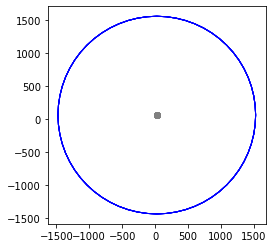

In [18]:
geodata['geometry'] = geodata['buffer']


In [19]:
#NON-EDITABLE TEST CELL
print(geodata.head())

                                            geometry  \
0  POLYGON ((1525.083 60.212, 1517.860 -86.814, 1...   
1  POLYGON ((1524.938 60.169, 1517.715 -86.857, 1...   
2  POLYGON ((1524.740 60.160, 1517.518 -86.866, 1...   
3  POLYGON ((1524.814 60.219, 1517.591 -86.807, 1...   
4  POLYGON ((1524.963 60.292, 1517.740 -86.733, 1...   

                                             address  id       name  \
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...   0       Itis   
1  Salaattiasema, 14-20, Mannerheimintie, Keskust...   1      Forum   
2  UpHouse LKV, 11, Piispansilta, Matinkylä, Suur...   2  Iso-Omena   
3  Aktia, 3-9, Leppävaarankatu, Säteri, Etelä-Lep...   3      Sello   
4  Stockmann, 3, Vantaanportinkatu, Vantaanportti...   4      Jumbo   

                                             addr  \
0            Itäkatu 1-7, 00930 Helsinki, Finland   
1  Mannerheimintie 14-20, 00100 Helsinki, Finland   
2           Piispansilta 11, 02230 Espoo, Finland   
3       Leppävaarankatu 

Optional: at this point, you can drop out unnecessary columns from the geodataframe. In the next problem, 
we will only need these columns: `'id', 'name', 'geometry'`

In [20]:
geodata = geodata.drop(['address','addr','buffer'],axis=1)
geodata.head()

,geometry,id,name
0,"POLYGON ((1525.083 60.212, 1517.860 -86.814, 1...",0,Itis
1,"POLYGON ((1524.938 60.169, 1517.715 -86.857, 1...",1,Forum
2,"POLYGON ((1524.740 60.160, 1517.518 -86.866, 1...",2,Iso-Omena
3,"POLYGON ((1524.814 60.219, 1517.591 -86.807, 1...",3,Sello
4,"POLYGON ((1524.963 60.292, 1517.740 -86.733, 1...",4,Jumbo


## Problem 3: How many people live near shopping centers? (5 points)

Last step in our analysis is to make a spatial join between our buffer layer and population data in order to find out **how many people live near each shopping center**. We will use the same data as we did during [lesson 3](https://automating-gis-processes.github.io/site/notebooks/L3/spatial-join.html#Spatial-join); **a Population Grid** that is available via the HSY wfs. 

Alternatively, you can also download the data from the [Helsinki Region Infoshare (HRI)](https://www.hsy.fi/fi/asiantuntijalle/avoindata/Sivut/AvoinData.aspx?dataID=7) as a shapefile (using wget).

The coordinate reference system of the population grid is **ETRS GK-25 (EPSG:3879)**.


**Steps:**

- Read the population grid into a geodataframe

- Select only the useful columns from the population grid: ``'asukkaita'`` (=population count per grid square) and ``'geometry'`` 

- Make a spatial join between your buffered point layer and population grid layer. Join the information now from buffer layer **into the population grid layer**

- Group the joined layer by shopping center index

- Calculate the sum of population living within 1.5 km for each shopping center.

**Finally:**

- Print out the population living within 1.5 km from each shopping center:

     - Itis
     - Forum
     - Iso-omena
     - Sello
     - Jumbo
     - REDI
     - Tripla
     
**Final print out should contain both the shopping center name and population count**, for example: `26532 people live within 1.5 km from Iso-Omena`.

*Feel free to divide your solution into several codeblocks! Remember to comment your code  :)*

In [183]:
# Specify the url for web feature service
url = 'https://kartta.hsy.fi/geoserver/wfs'

# Specify parameters (read data in json format).
# Available feature types in this particular data source: http://geo.stat.fi/geoserver/vaestoruutu/wfs?service=wfs&version=2.0.0&request=describeFeatureType
params = dict(service='WFS',
              version='2.0.0',
              request='GetFeature',
              typeName='asuminen_ja_maankaytto:Vaestotietoruudukko_2018',
              outputFormat='json')

# Fetch data from WFS using requests
r = requests.get(url, params=params)

# Create GeoDataFrame from geojson
pop = gpd.GeoDataFrame.from_features(geojson.loads(r.content),crs=3879)



In [184]:
#NON-EDITABLE TEST CELL
# Check your input data
print("Number of rows:", len(pop))
print(pop.head(3))

Number of rows: 5832
                                            geometry  index  asukkaita  \
0  POLYGON ((25472499.995 6689749.005, 25472499.9...    688          9   
1  POLYGON ((25472499.995 6685998.998, 25472499.9...    703          5   
2  POLYGON ((25472499.995 6684249.004, 25472499.9...    710          8   

   asvaljyys  ika0_9  ika10_19  ika20_29  ika30_39  ika40_49  ika50_59  \
0       28.0      99        99        99        99        99        99   
1       51.0      99        99        99        99        99        99   
2       44.0      99        99        99        99        99        99   

   ika60_69  ika70_79  ika_yli80  
0        99        99         99  
1        99        99         99  
2        99        99         99  


In [188]:
# Change the name of a column
pop = pop.rename(columns={'asukkaita': 'pop18'})

# Subset columns
pop = pop[["pop18", "geometry"]]

# Check crs's match
# print(pop.crs, geodata.crs)

join = gpd.sjoin(pop, geodata, how="inner", op="within")

join.head()

/Users/josephgarner/opt/miniconda3/envs/python-gis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,pop18,geometry,index_right,id,name


In [187]:
join=join[["pop18","name"]]

grouped=join.groupby("name").sum()

# Report how many people live within 1.5 km distance from each shopping center
for group_name,df_group in grouped:
    print(df_group)

ValueError: too many values to unpack (expected 2)

**Reflections:**
    
- How challenging did you find problems 1-3 (on scale to 1-5), and why?
- What was easy?
- What was difficult?

YOUR ANSWER HERE

Well done! Now you can continue to [problem 4](Exercise-3-Problem-4.ipynb)